# Distribution of features (enhancers, ChIP peaks) shared within TADs with dysregulated genes

**Purpose:** Plotting number of enhancers or ChIP peaks shared within a TAD boundary and number of up/down regulated genes to visualize a relationship to gene dysregulation in 1 day of dNipBL-depleted mESCs. 

In [27]:
# ignore FutureWarnings generated by pandas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import bioframe as bf
from gtfparse import read_gtf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [28]:
import plotting_histogram_functions as pfn
import filter_gene_functions as flt

In [29]:
# import gene data, cutoff=6, label DE status
day1_res_df = flt.load_tss_df()
day1_res_df = flt.label_DE_status(day1_res_df)

INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_type', 'gene_name', 'transcript_type', 'transcript_name', 'level', 'transcript_support_level', 'mgi_id', 'tag', 'havana_gene', 'havana_transcript', 'protein_id', 'ccdsid', 'ont']


# Distribution of features and DEGs within a TAD

* Annotated Chen/Whyte enhancers, basic DE split
* Annotated Chen/Whyte enhancers, with quantile split
* Enhancer-associated peaks: H3K27ac, NipbL, CTCF, RAD21

In [30]:
# load features for boundaries
feature_dir = '/project/fudenber_735/GEO/bonev_2017_GSE96107/distiller-0.3.1_mm10/results/coolers/features'
insulation_table = pd.read_table(feature_dir+'/bonev2017.HiC_ES.mm10.mapq_30.1000.window_200000.insulation')

# Defining TADs using midpoints between boundaries
tad_mid_df = flt.tad_windows_from_boundaries(insulation_table, take_midpoint=True)


In [31]:
dataset_folder = '/project/fudenber_735/collaborations/karissa_2022/2022_09_features_for_RNAseq/Published_datasets/'

chen_s1 = 'Enhancers_Chen2012_S1_remapped_mm10.bed'
whythe_super = 'Super-enhancers_mESCs_(OSN-MED1)_Wythe-Cell-2023_mm10-lifetover.bed'
# whythe_reg = 'remapped_enhancers_Whyte_2013_mm9.bed.txt' <-- where is this?

enhancers = {'chen_s1' : dataset_folder+chen_s1,
             'wythe_super' : dataset_folder+whythe_super}

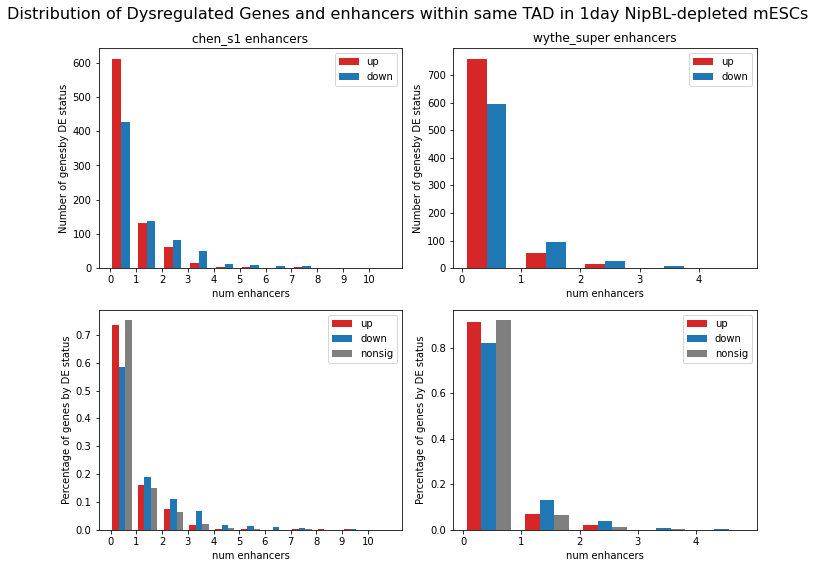

In [32]:
fig, axs = plt.subplots(2,2, figsize=(10, 8))
fig.suptitle(('Distribution of Dysregulated Genes and '
             'enhancers within same TAD in 1day NipBL-depleted mESCs'),
             fontsize=16)

for (enh_source, file), axi in zip(enhancers.items(), np.arange(axs.shape[0])):

    # Annotate number of enhancers within the tad
    df = tad_mid_df.copy()
    enhancer_df = flt.get_enhancer_bioframe(file)
    df['num_enhancers'] = bf.count_overlaps(df, enhancer_df)['count']
    
    pfn.distribution_features_by_region(df,
                                 day1_res_df,
                                 feature_category_colors={"up": 'tab:red', 
                                                      "down": 'tab:blue'},
                                 plot_title='{} enhancers'.format(enh_source),
                                 percentage=False,
                                 ax=axs[0, axi]
                                )
                                  
    pfn.distribution_features_by_region(df,
                                        day1_res_df,
                                        plot_title='',
                                        ax=axs[1, axi]
                                       )
    
plt.tight_layout()
plt.show()

In [33]:
quantiled_df = day1_res_df.copy()

quantiled_df = flt.label_quantiles(quantiled_df, quantile_value_col="avg_vst_counts")
quantiled_df = flt.label_quantiles(quantiled_df, quantile_value_col="avg_vst_counts", label_subset='up')
quantiled_df = flt.label_quantiles(quantiled_df, quantile_value_col="avg_vst_counts", label_subset='down')

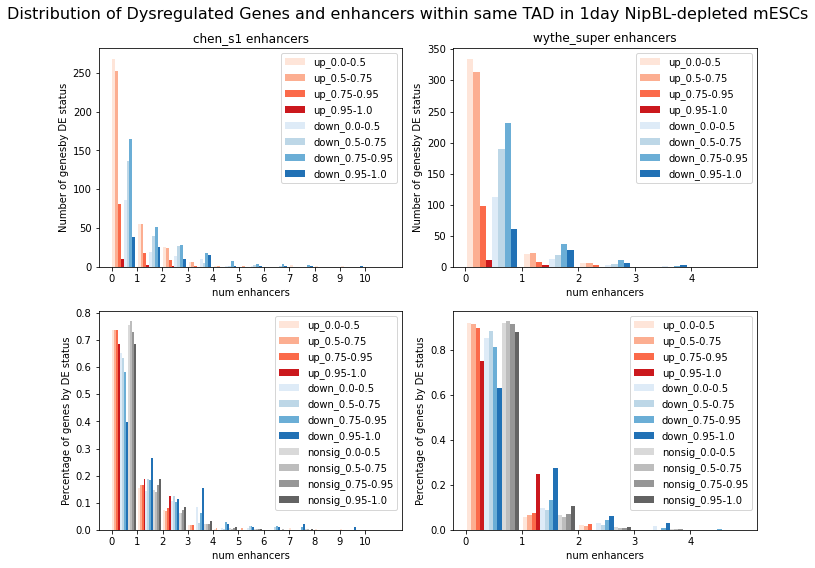

In [34]:
category_colormap_big = {'up_0.0-0.5' : '#fee5d9',
                         'up_0.5-0.75' : '#fcae91',
                         'up_0.75-0.95' : '#fb6a4a',
                         'up_0.95-1.0' : '#cb181d',

                         'down_0.0-0.5' : '#deebf7',
                         'down_0.5-0.75' : '#bdd7e7',
                         'down_0.75-0.95' : '#6baed6',
                         'down_0.95-1.0' : '#2171b5',

                         'nonsig_0.0-0.5' : '#d9d9d9',
                         'nonsig_0.5-0.75' : '#bdbdbd',
                         'nonsig_0.75-0.95' : '#969696',
                         'nonsig_0.95-1.0' : '#636363'
                        }

de_category_colormap_big = {'up_0.0-0.5' : '#fee5d9',
                         'up_0.5-0.75' : '#fcae91',
                         'up_0.75-0.95' : '#fb6a4a',
                         'up_0.95-1.0' : '#cb181d',

                         'down_0.0-0.5' : '#deebf7',
                         'down_0.5-0.75' : '#bdd7e7',
                         'down_0.75-0.95' : '#6baed6',
                         'down_0.95-1.0' : '#2171b5'
                        }

fig, axs = plt.subplots(2,2, figsize=(10, 8))
fig.suptitle(('Distribution of Dysregulated Genes and '
             'enhancers within same TAD in 1day NipBL-depleted mESCs'),
             fontsize=16)

for (enh_source, file), axi in zip(enhancers.items(), np.arange(axs.shape[0])):

    # Annotate number of enhancers within the tad
    df = tad_mid_df.copy()
    
    enhancer_df = flt.get_enhancer_bioframe(file)
    df['num_enhancers'] = bf.count_overlaps(df, enhancer_df)['count']
    
    pfn.distribution_features_by_region(df,
                                 quantiled_df,
                                 feature_category_colors=de_category_colormap_big,
                                 plot_title='{} enhancers'.format(enh_source),
                                 percentage=False,
                                 ax=axs[0, axi]
                                )
                                  
    pfn.distribution_features_by_region(df,
                                        quantiled_df,
                                        plot_title='',
                                        feature_category_colors=category_colormap_big,
                                        ax=axs[1, axi]
                                       )
    
plt.tight_layout()
plt.show()

In [35]:
# Load Chip-Seq files 
chip_folder = "/project/fudenber_735/collaborations/karissa_2022/2022_09_features_for_RNAseq/ChIP-seq_in_WT-parental-E14/"

nipbl = "Nipbl_112.175.197.114.177.196_peaks.xls.bed"
promoter = "H3K27ac_EA92-97_peaks.xls.bed"
ctcf = 'CTCF_peaks_called_on_4reps_foundInatLeast2reps_noBlacklist.bed'
rad21 = 'RAD21_peaks_called_on_6reps_foundInatLeast3reps_noBlacklist.bed'

chip_peaks = {'H3K27ac' : chip_folder+promoter, 
              'NipBL' : chip_folder+nipbl,
              'CTCF' : chip_folder+ctcf,
              'RAD21' : chip_folder+rad21
             }

In [52]:
flt.get_peak_bioframe(chip_folder+nipbl).head(3)

,chrom,start,end,name,score,strand
0,chr1,3343574,3343836,Nipbl_112.175.197.114.177.196_peak_1,8.63551,NaN
1,chr1,3445680,3446045,Nipbl_112.175.197.114.177.196_peak_2,5.18494,NaN
2,chr1,4150860,4151100,Nipbl_112.175.197.114.177.196_peak_3,10.99370,NaN


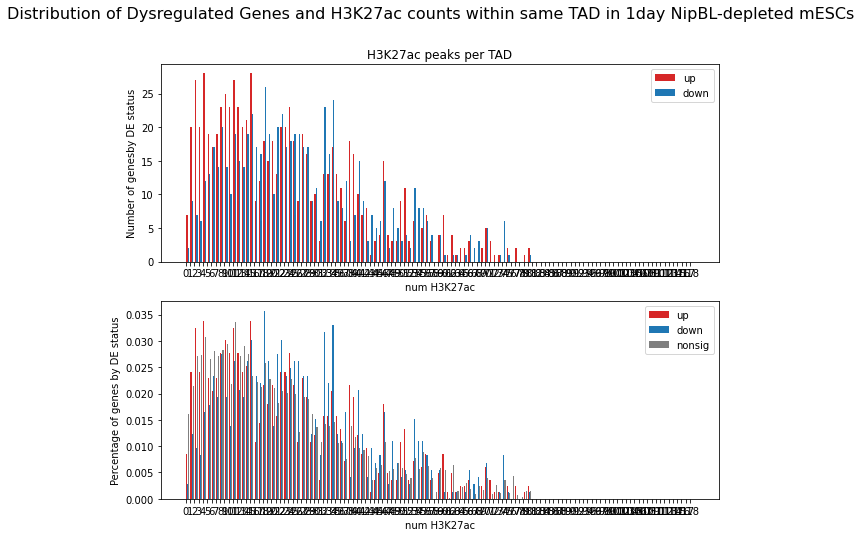

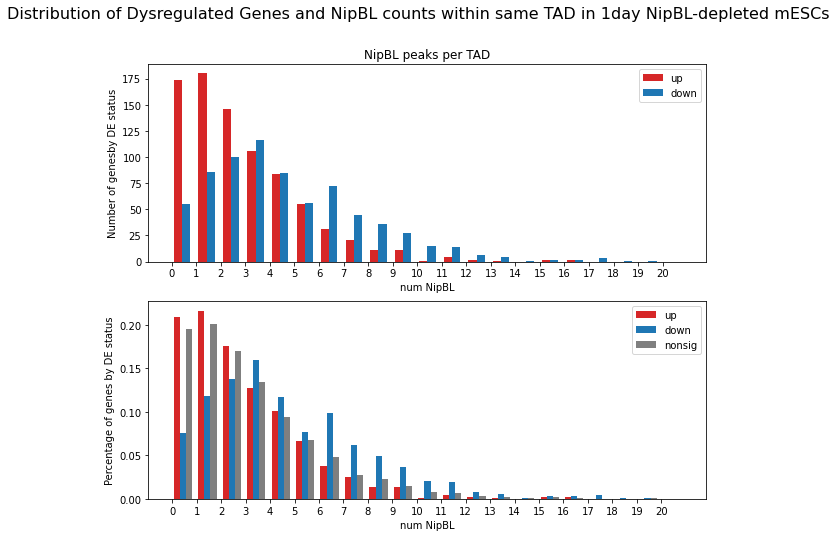

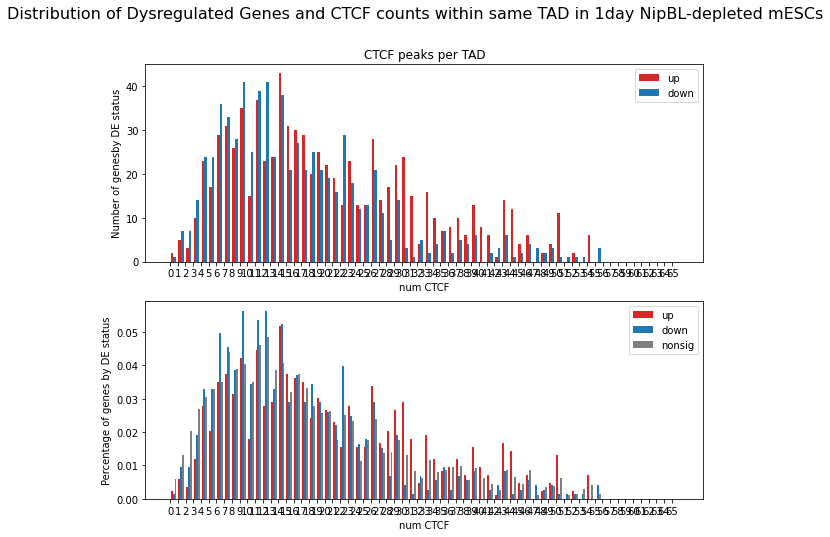

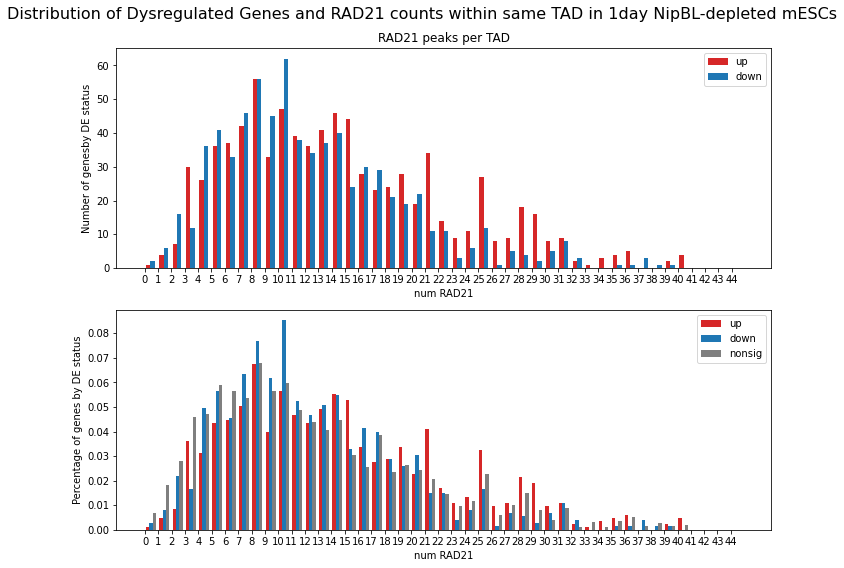

In [54]:
for (feat, file) in chip_peaks.items():

    fig, axs = plt.subplots(2, 1, figsize=(10, 8))
    fig.suptitle(('Distribution of Dysregulated Genes and '
                '{} counts within same TAD in 1day NipBL-depleted mESCs'.
                format(feat)),
                fontsize=16)

    # Annotate number of enhancers within the tad
    df = tad_mid_df.copy()
    chip_df = flt.get_peak_bioframe(file)
    df['num_'+feat] = bf.count_overlaps(df, chip_df)['count']
    
    pfn.distribution_features_by_region(df,
                                day1_res_df,
                                feature_category_colors={"up": 'tab:red', 
                                                    "down": 'tab:blue'},
                                region_group_col='num_'+feat,
                                plot_title='{} peaks per TAD'.format(feat),
                                percentage=False,

                                ax=axs[0]
                                )
                                
    pfn.distribution_features_by_region(df,
                                        day1_res_df,
                                        plot_title='',
                                        region_group_col='num_'+feat,
                                        ax=axs[1]
                                    )
    
plt.tight_layout()
plt.show()

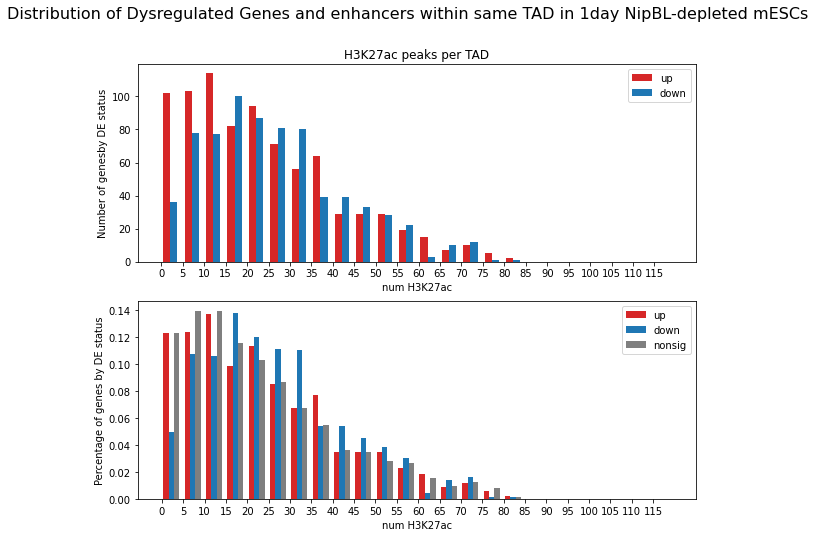

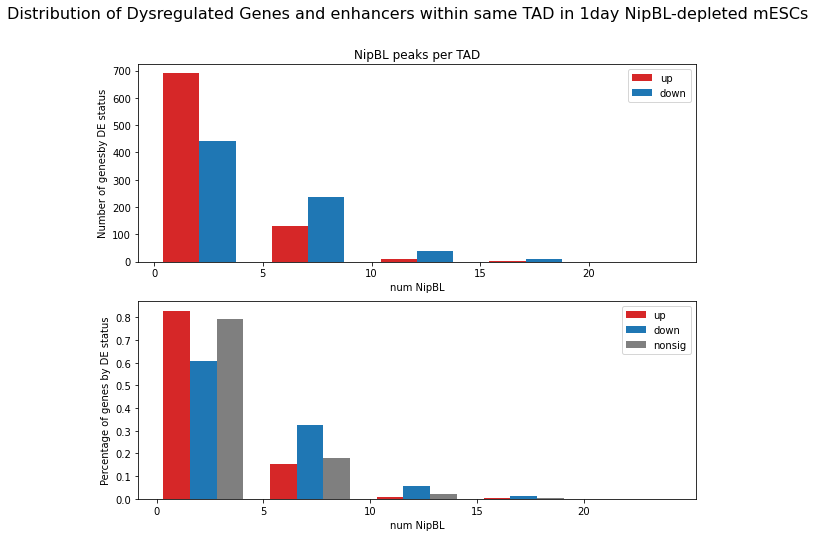

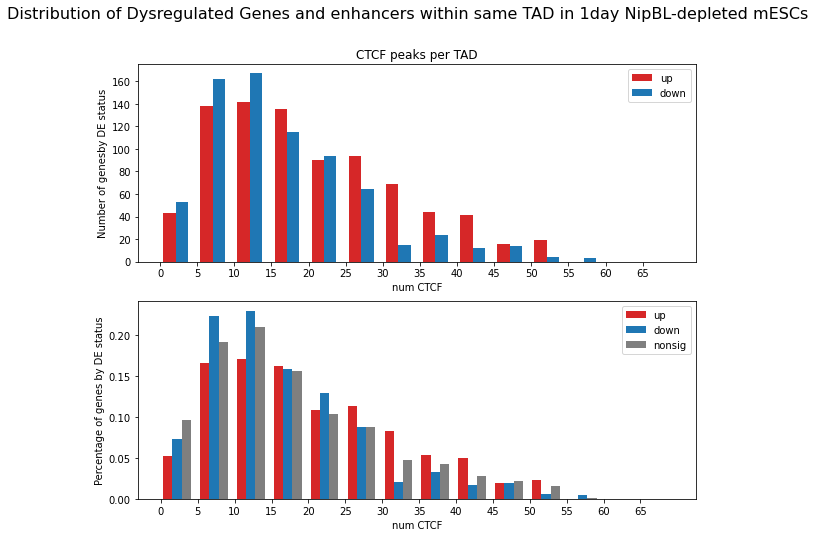

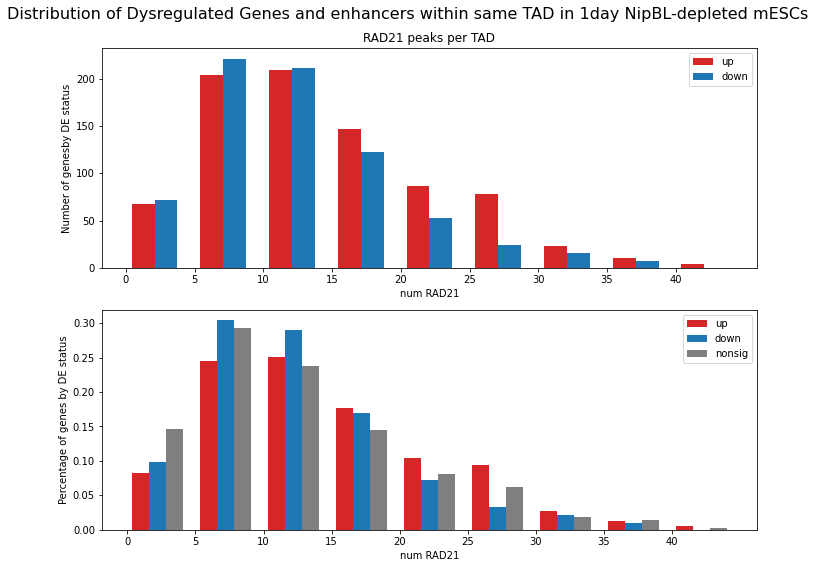

In [21]:
# applying binning by groups of 5
for (feat, file) in chip_peaks.items():

    fig, axs = plt.subplots(2, 1, figsize=(10, 8))
    fig.suptitle(('Distribution of Dysregulated Genes and '
                '{} counts within same TAD in 1day NipBL-depleted mESCs'.
                format(feat)),
                fontsize=16)

    # Annotate number of enhancers within the tad
    df = tad_mid_df.copy()
    chip_df = flt.get_peak_bioframe(file)
    df['num_'+feat] = bf.count_overlaps(df, chip_df)['count']
    
    pfn.distribution_features_by_region(df,
                                day1_res_df,
                                feature_category_colors={"up": 'tab:red', 
                                                    "down": 'tab:blue'},
                                region_group_col='num_'+feat,
                                plot_title='{} peaks per TAD'.format(feat),
                                percentage=False,
                                bin_size=5,
                                ax=axs[0]
                                )
                                
    pfn.distribution_features_by_region(df,
                                        day1_res_df,
                                        plot_title='',
                                        region_group_col='num_'+feat,
                                        bin_size=5,
                                        ax=axs[1]
                                    )
    
plt.tight_layout()
plt.show()